# Praca domowa 1


In [133]:
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
from sklearn.model_selection import train_test_split

### Dane XOR

### Implementacja sieci MLP do klasyfikacji 

*Dane*

Poniżej kod tworzący dane do testowania, będące danymi typu XOR. Od razu tworzę zarówno zbiór treningowy jak i testowy, tak aby móc go potem wykorzystać do pokazywania jak trenują się kolejne sieci.

In [58]:
xor_x_train = np.random.uniform(low=-4, high=4, size=(500,2))
xor_y_train = (np.bitwise_xor(np.sign(xor_x_train[:,0]).astype(int),np.sign(xor_x_train[:,1]).astype(int))/2+1).astype(int)

xor_x_test = np.random.uniform(low=-4, high=4, size=(100,2))
xor_y_test = (np.bitwise_xor(np.sign(xor_x_test[:,0]).astype(int),np.sign(xor_x_test[:,1]).astype(int))/2+1).astype(int)

*Wizualizacja danych* 

Jak widać poniżej, stworzone dane wyglądają tak jak miały.

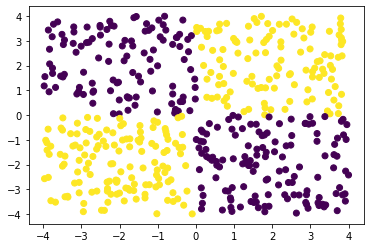

In [59]:
plt.scatter(xor_x_train[:,0], xor_x_train[:,1], c=xor_y_train)

In [60]:
df_train=np.c_[xor_x_train, xor_y_train]
df_test=np.c_[xor_x_test, xor_y_test]

dataloader_train = torch.utils.data.DataLoader(df_train, batch_size=1)
data_train = next(iter(dataloader_train))
X_train,y_train=data_train[:, 0:2], data_train[:, 2]

dataloader_test = torch.utils.data.DataLoader(df_test, batch_size=1)
data_test = next(iter(dataloader_test))
X_test,y_test=data_test[:, 0:2], data_test[:, 2]

*Model*

Pierwsza z wytrenowanych sieci, liczba ukrytych warstw oraz neuronów na każdej z warstw zrobiona metodą prób i błędów oraz przy użyciu playground.tensorflow.org. Sieć ta posiada dwie warstwy ukryte, każda po 4 neurony.

In [61]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,2)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=2, bias=True)
)

*Optymalizacja*

In [62]:
learning_rate = 0.03
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

*Uczymy*

In [63]:
num_iter = 20

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja procesu uczenia dla XOR dla learning rate 0.03*

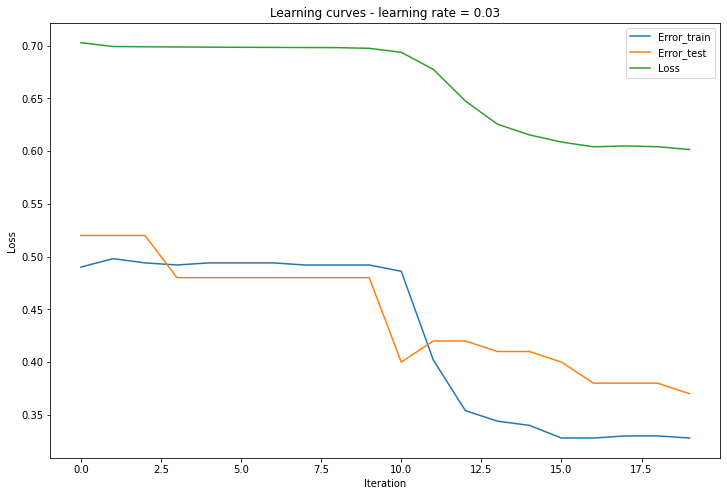

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - learning rate = 0.03")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

Jak widać na powyższym wykresie, model się uczy i widać to już przy tak niewielkiej liczbie iteracji, jaką jest 20. Nie widać, by model zdążył się przeuczyć (byłoby to widać po tym, że błąd dla zbioru treningowego by spadał, a dla testowego by rósł).

### Analiza porównawcza *learning_rate*

Dodatkowo, oprócz powyższej sieci posiadającej learning rate zdecydowałam się na wytrenowanie kolejnych, posiadających learning rate o wartościach kolejno: 0.01, 0.05 oraz 0.07.
Trenowanie i wyniki przestawiające proces uczenia przedstawiam poniżej.

*Learning rate = 0.01 dla XOR*

In [90]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,2) 
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=2, bias=True)
)

In [91]:
learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

In [92]:
num_iter = 200

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja dla learning_rate 0.01*

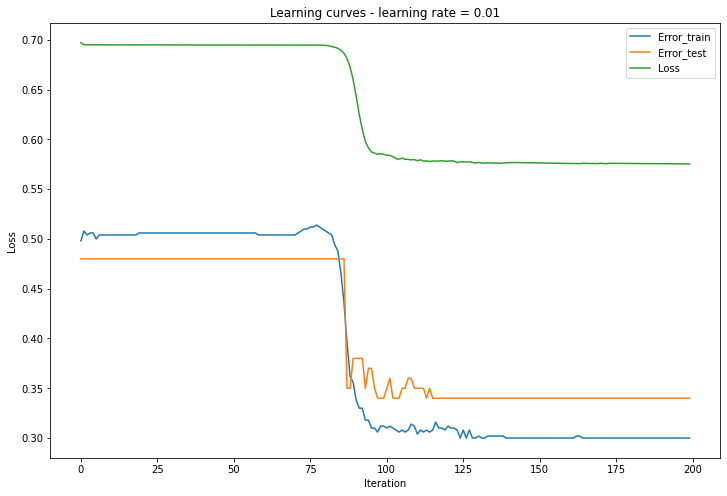

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - learning rate = 0.01")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Learning rate = 0.05 dla XOR*

In [75]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,2) 
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=2, bias=True)
)

In [76]:
learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

In [77]:
num_iter = 20

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja dla learning_rate 0.05*

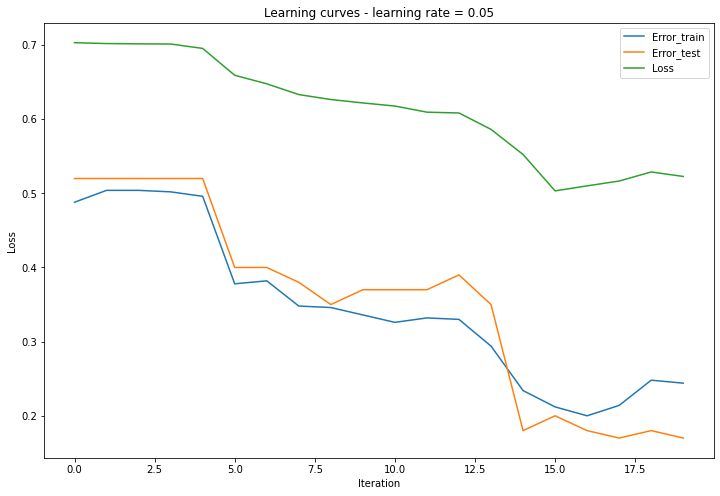

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - learning rate = 0.05")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Learning rate = 0.07 dla XOR*

In [86]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,2) 
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=2, bias=True)
)

In [87]:
learning_rate = 0.07
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

In [88]:
num_iter = 20

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja dla learning_rate 0.07*

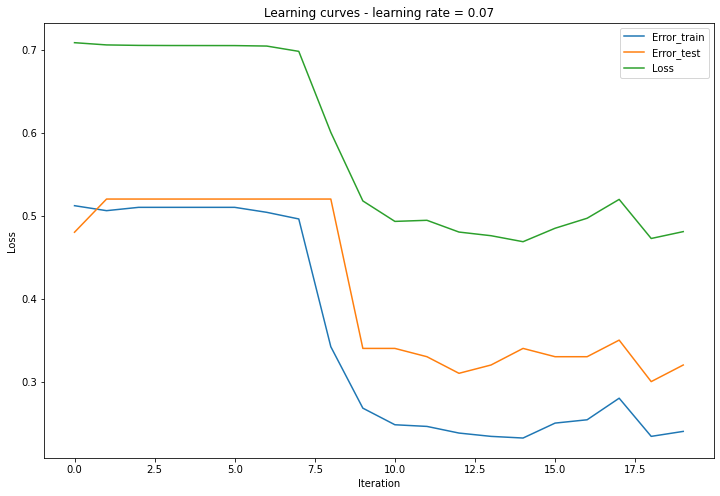

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - learning rate = 0.07")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Wnioski*

Powyżej przedstawiłam cztery różne learning rate, dla których trenowałam tą samą sieć. Najlepsze wyniki (mierząc miarą CrossEntropyLoss) zostały osiągnięte przy wartości learning rate, poniżej 0.2. Im mniejszy learning rate, tym sieć dłużej się uczy, stąd dla learning rate 0.01 zwiększyłam liczbę epok, by w ogóle było widać, że sieć się uczy.

### Analiza porównawcza różnych architektur sieci

Po dokonaniu powyżej analizy porównawczej dla różnych wartości learning rate, przyszedł czas na porównanie różnych architektur sieci. Dotychczas zaimplementowana sieć ma 2 warstwy ukryte, każda po 4 neurony. W poniższej części wypróbuję, jak uczą się następujące sieci przy stałym learning rate (0.01): 
* 2 warstwy ukryte, 4 i 2 neurony, 
* 2 warstwy ukryte, 16 i 16 neuronów.

*2 warstwy ukryte, 4 i 2 neurony*

In [106]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), 
    torch.nn.ReLU(),
    torch.nn.Linear(4,2), 
    torch.nn.ReLU(),
    torch.nn.Linear(2,2) 
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=2, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2, out_features=2, bias=True)
)

In [107]:
learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

In [108]:
num_iter = 200

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja sieci z dwoma warstwami, 4 i 2*

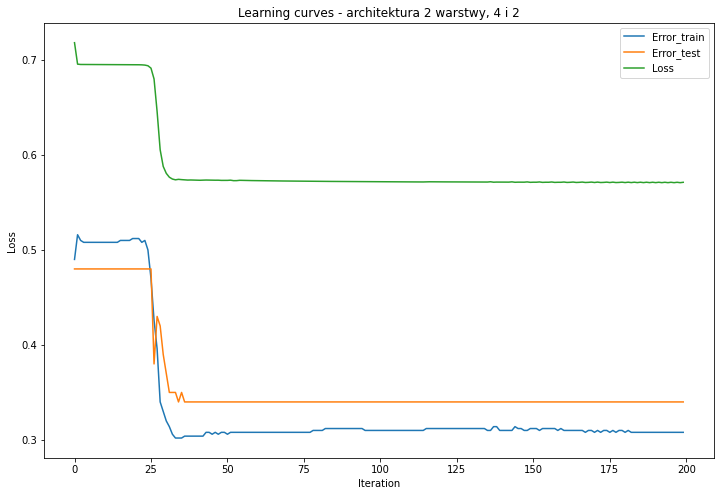

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - architektura 2 warstwy, 4 i 2")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*2 warstwy ukryte, 16 i 16 neuronów*

In [114]:
#implementation of neural network for XOR problem

net = torch.nn.Sequential(
    torch.nn.Linear(2, 16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,2) 
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=2, bias=True)
)

In [115]:
learning_rate = 0.003 # dla learning rate 0.01 skakało
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

In [116]:
num_iter = 200

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:2],data[:,2].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja sieci z dwoma warstwami, 16 i 16*

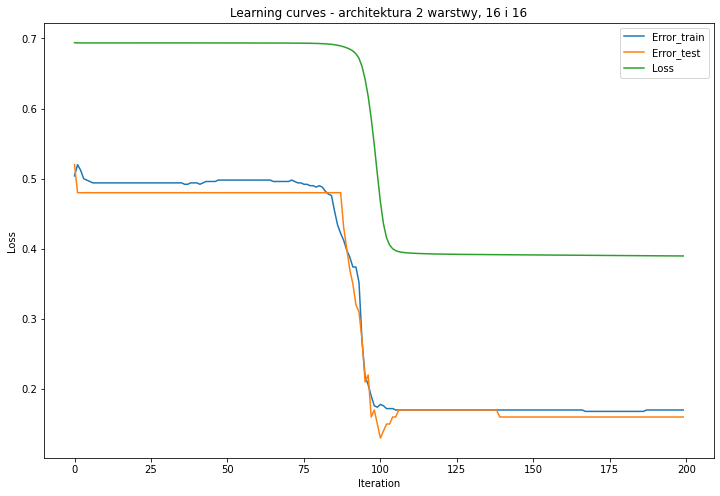

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - architektura 2 warstwy, 16 i 16")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Wnioski*

Dla sprawdzonych powyżej kilku wybranych architektur starałam się zachować ten sam learning rate, jednak w przypadku drugiej z tych sieci na wykresie loss zbyt bardzo skakało i postanowiłam je zmiejszyć. Widocznie lepiej sprawuje się sieć o właśnie learning rate 0.003 oraz dwóch warstwach, po 16 neuronów każda.

*Wnioski dla sieci dla danych XOR*

Podsumowując, sieć mająca 2 warstwy ukryte, każda po 16 neuronów oraz z użyciem learning rate na poziomie 0.003 wydaje się być najlepiej nauczona spośród wszystkich powyższych.

### Dane iris

### Implementacja sieci MLP do klasyfikacji 

*Dane*

Pobranie ramki danych zawierających zbiór iris.

In [123]:
from sklearn import datasets
import pandas as pd

In [134]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

*Wygląd ramki danych*

In [135]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


*Wizualizacja danych*

Jak widać target danych to trzy różne klasy, zależne od czterech zmiennych: sepal length, sepal width, petal length, petal width.

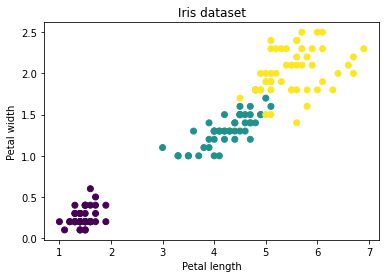

In [136]:
plt.scatter(x=iris_df["petal length (cm)"], y=iris_df["petal width (cm)"], c=iris_df["target"])
plt. title("Iris dataset")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [142]:
#divide into training and test data sets
iris_df_train, iris_df_test = train_test_split(iris_df[iris_df.columns.values[:]],test_size=0.3)

dataloader_train = torch.utils.data.DataLoader(np.array(iris_df_train), batch_size=1)

dataloader_test = torch.utils.data.DataLoader(np.array(iris_df_test), batch_size=1)

*Model*

Pierwsza z wytrenowanych sieci dla tego zbioru danych.

In [143]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [144]:
learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [145]:
num_iter = 20

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

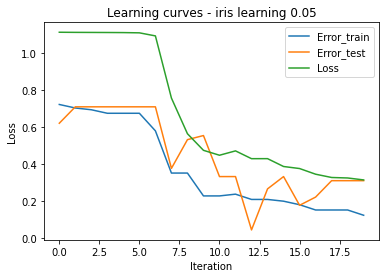

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris learning 0.05")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Wnioski*
Jak widać sieć uczy się przy wykorzystanej architekturze i można to zauważyć nawet już przy dwudziestu iteracjach.

*Analiza porównawcza dla różnych wartości learning rate*

Tak jak przy poprzedniej sieci, również tutaj porównam różne wartości learning rate. Będzie to 0.01, 0.03 oraz 0.07.

*Learning rate 0.01*

Zwiększam ilość iteracji, by na wykresie było już widać dobrze jak się uczy.

In [148]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [149]:
learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [152]:
num_iter = 40

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

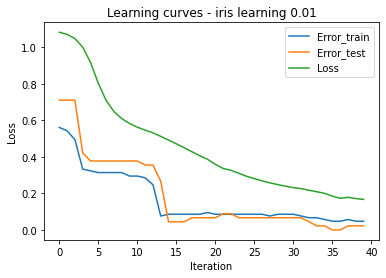

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris learning 0.01")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Learning rate 0.03*

In [154]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [155]:
learning_rate = 0.03
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [156]:
num_iter = 40

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

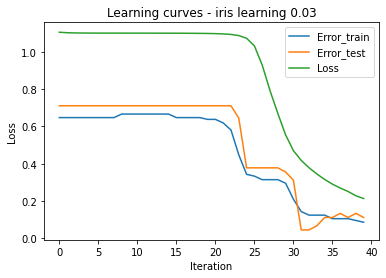

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris learning 0.03")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Learning rate 0.07*

In [158]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=3, bias=True)
)

In [159]:
learning_rate = 0.07
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [160]:
num_iter = 40

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

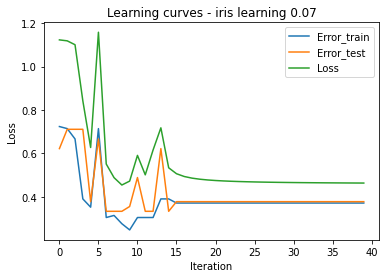

In [161]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris learning 0.07")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Wnioski*

Dla learning rate 0.01 oraz 0.03 wyraźnie widać skuteczność sieci w uczeniu, przy 0.01 następuje ono bardzo szybko. Po zmienieniu liczby epok z 20 na 40, przy learning rate 0.07 również widać proces uczenia, ale nie jest on jednak aż tak dobry jak przy 0.01 oraz 0.03.

*Analiza porównawcza dla różnych architektur*

Tak jak przy poprzedniej sieci, również tutaj porównam różne architektury. Zastosuję learning rate 0.01, jako że na nim ostatnio występowały najlepsze wyniki. Będą to:
* 2 warstwy, 8 i 8 neuronów,
* 3 warstwy, 8, 16, 8 neuronów.

*2 warstwy, 8 i 8*

In [168]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 8), 
    torch.nn.ReLU(),
    torch.nn.Linear(8,8), 
    torch.nn.ReLU(),
    torch.nn.Linear(8,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
)

In [169]:
learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [170]:
num_iter = 100

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

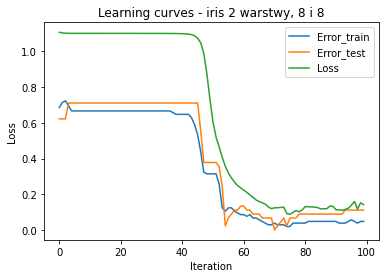

In [171]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris 2 warstwy, 8 i 8")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*3 warstwy, 8, 16 i 8*

In [176]:
#implementation of neural network for iris problem

net = torch.nn.Sequential(
    torch.nn.Linear(4, 8), 
    torch.nn.ReLU(),
    torch.nn.Linear(8,16), 
    torch.nn.ReLU(),
    torch.nn.Linear(16,8),
    torch.nn.ReLU(),
    torch.nn.Linear(8,3)
)

def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)


Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=3, bias=True)
)

In [177]:
learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [178]:
num_iter = 200

losses = []
errors_train = []
errors_test = []

for epoch in range(num_iter):
    losses_iter = []
    errors_train_iter = []
    errors_test_iter = []
    
    for data in dataloader_test:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

    for data in dataloader_train:
        X, y = data[:,0:4],data[:,4].long()
        y_hat = net(X.float())
        errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        losses_iter += [l.mean().item()]
        optimizer.step()
    
    errors_train += [np.mean(errors_train_iter)]
    errors_test += [np.mean(errors_test_iter)]
    losses += [np.mean(losses_iter)]

*Wizualizacja*

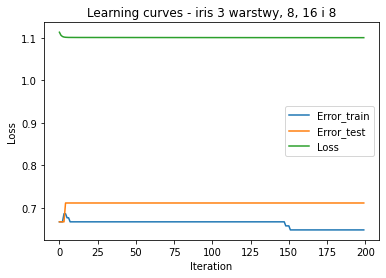

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves - iris 3 warstwy, 8, 16 i 8")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

*Wnioski*

Po wynikach widać, że architektura z dwoma warstwami, po 8 neuronów każda dobrze sprawdza się do danego problemu, szybko się uczy, błędy są niewielkie. Natomiast zaproponowana architektura z trzema warstwami nie uczy się, nawet mimo niewielkiego learning rate oraz wielu iteracji. Nie jest ona dobra do rozwiązania akurat tego problemu.

*Wnioski dla iris data set*

Wydaje się, że z przetestowanych wyżej architektur, najlepiej sprawdza się ta, z dwoma warstwami ukrytymi, po 8 neuronów każda oraz learning rate na poziomie 0.01.